In [1]:
import pytesseract
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import glob
from os.path import split
import pandas as pd
import datetime


#def get_images():

    #imdir = '../raw_data/label_composition_images/'
    #ext = ['png', 'jpg', 'gif']    # Add image formats here

    #files = []
    #[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

    #images = [cv2.imread(file) for file in files]

    #return images

In [2]:
image = cv2.imread('../raw_data/label_composition_images/IMG_1378.JPG')

In [3]:
def preprocessing_image(image):
    #image = cv2.imread('../raw_data/label_composition_images/IMG_1378.JPG')
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise = cv2.medianBlur(grayscale,5)
    #threshold = cv2.threshold(noise, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    #threshold doesn't really work

    #dilation
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(noise, kernel, iterations = 1)

    #erosion

    kernel = np.ones((5,5),np.uint8)
    erode= cv2.erode(dilate, kernel, iterations = 1)

    #opening - erosion followed by dilation
    #definition opening(image):
    #kernel = np.ones((5,5),np.uint8)
    #return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    #canny edge detection

    #canny = cv2.Canny(threshold, 100, 200)

    #skew correction
    #definition deskew(image):
    coords = np.column_stack(np.where(erode > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = erode.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskew = cv2.warpAffine(erode, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)


    #template matching
    #definition match_template(image, template):
    #return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

    #definition sharp(image):
    #sharp= cv2.bilateralFilter(deskew,9,75,75)
    return deskew

In [4]:
def image_to_string(image):
    
    preprocessed = preprocessing_image(image)
   
        #img = Image.fromarray(preprocessed, 'RGB')
    results = pytesseract.image_to_string(preprocessed)
    return results


In [7]:
image_to_string(image)

'  \n\nGB: Shell fabric1:100% polyester\nrecycled\n\nLining: 100% polyester recycled\nPadding: 100% recycled content\nNL: Bovenstoft: 100% polyester\ngerecyciede\n\nVoering: 100% polyester getecyelade\nVulling: 100% geracycleds inhoud\n\nDE: Oberstofft: 100% Polyester recyeett\nFutter: 100% Polyester recyceit\nWattierung: 100% recycelt Inhalt\n\nFR: Etoffe extérieuret: 100%\npolyester recycié\n\nDoublura: 100% polyester recycle\nRemplissage: 100% recyclé content\n\nanti\n\n \n\n \n\x0c'

In [56]:
image = cv2.imread('../raw_data/label_composition_images/IMG_1378.JPG')

In [5]:
preprocessed = preprocessing_image(image)

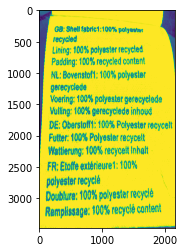

In [58]:
import matplotlib.pyplot as plt 
string = image_to_string(image)
string
plt.imshow(preprocessed)

In [62]:
string

'  \n\nGB: Shell fabric1:100% polyester\nrecycled\n\nLining: 100% polyester recycled\nPadding: 100% recycled content\nNL: Bovenstoft: 100% polyester\ngerecyciede\n\nVoering: 100% polyester serecyelade\nVulling: 100% geracyclede inhoud\n\nDE: Oberstofft: 100% Polyester reeyveett\nFutter: 100% Polyester recyceit\nWattierung: 100% recycelt Inhalt\n\nFR: Etoffe extéricuret: 100%\npolyester recycle\n\nDoublura: 100% polyester recycle\nRemplissage: 100% recyclé content\n\n——_- —-\n\n \n\n \n\x0c'

In [5]:
ocr_result = image_to_string(image)
ocr_result

'  \n\nGB: Shell fabric1:100% polyester\nrecycled\n\nLining: 100% polyester recycled\nPadding: 100% recycled content\nNL: Bovenstoft: 100% polyester\ngerecyciede\n\nVoering: 100% polyester serecyelade\nVulling: 100% geracyclede inhoud\n\nDE: Oberstofft: 100% Polyester reeyveett\nFutter: 100% Polyester recyceit\nWattierung: 100% recycelt Inhalt\n\nFR: Etoffe extéricuret: 100%\npolyester recycle\n\nDoublura: 100% polyester recycle\nRemplissage: 100% recyclé content\n\n——_- —-\n\n \n\n \n\x0c'

In [8]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(ocr_result) 
  
ocr_result_tokenized = [w for w in word_tokens if not w in stop_words] 
  
ocr_result_tokenized

['GB',
 ':',
 'Shell',
 'fabric1:100',
 '%',
 'polyester',
 'recycled',
 'Lining',
 ':',
 '100',
 '%',
 'polyester',
 'recycled',
 'Padding',
 ':',
 '100',
 '%',
 'recycled',
 'content',
 'NL',
 ':',
 'Bovenstoft',
 ':',
 '100',
 '%',
 'polyester',
 'gerecyciede',
 'Voering',
 ':',
 '100',
 '%',
 'polyester',
 'serecyelade',
 'Vulling',
 ':',
 '100',
 '%',
 'geracyclede',
 'inhoud',
 'DE',
 ':',
 'Oberstofft',
 ':',
 '100',
 '%',
 'Polyester',
 'reeyveett',
 'Futter',
 ':',
 '100',
 '%',
 'Polyester',
 'recyceit',
 'Wattierung',
 ':',
 '100',
 '%',
 'recycelt',
 'Inhalt',
 'FR',
 ':',
 'Etoffe',
 'extéricuret',
 ':',
 '100',
 '%',
 'polyester',
 'recycle',
 'Doublura',
 ':',
 '100',
 '%',
 'polyester',
 'recycle',
 'Remplissage',
 ':',
 '100',
 '%',
 'recyclé',
 'content',
 '——_-',
 '—-']

In [9]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

ocr_token_lemmatized = [lemmatizer.lemmatize(word) for word in ocr_result_tokenized]

ocr_token_lemmatized

['GB',
 ':',
 'Shell',
 'fabric1:100',
 '%',
 'polyester',
 'recycled',
 'Lining',
 ':',
 '100',
 '%',
 'polyester',
 'recycled',
 'Padding',
 ':',
 '100',
 '%',
 'recycled',
 'content',
 'NL',
 ':',
 'Bovenstoft',
 ':',
 '100',
 '%',
 'polyester',
 'gerecyciede',
 'Voering',
 ':',
 '100',
 '%',
 'polyester',
 'serecyelade',
 'Vulling',
 ':',
 '100',
 '%',
 'geracyclede',
 'inhoud',
 'DE',
 ':',
 'Oberstofft',
 ':',
 '100',
 '%',
 'Polyester',
 'reeyveett',
 'Futter',
 ':',
 '100',
 '%',
 'Polyester',
 'recyceit',
 'Wattierung',
 ':',
 '100',
 '%',
 'recycelt',
 'Inhalt',
 'FR',
 ':',
 'Etoffe',
 'extéricuret',
 ':',
 '100',
 '%',
 'polyester',
 'recycle',
 'Doublura',
 ':',
 '100',
 '%',
 'polyester',
 'recycle',
 'Remplissage',
 ':',
 '100',
 '%',
 'recyclé',
 'content',
 '——_-',
 '—-']

In [6]:
ocr_splitted = ocr_result.splitlines()
ocr_splitted

['  ',
 '',
 'GB: Shell fabric1:100% polyester',
 'recycled',
 '',
 'Lining: 100% polyester recycled',
 'Padding: 100% recycled content',
 'NL: Bovenstoft: 100% polyester',
 'gerecyciede',
 '',
 'Voering: 100% polyester serecyelade',
 'Vulling: 100% geracyclede inhoud',
 '',
 'DE: Oberstofft: 100% Polyester reeyveett',
 'Futter: 100% Polyester recyceit',
 'Wattierung: 100% recycelt Inhalt',
 '',
 'FR: Etoffe extéricuret: 100%',
 'polyester recycle',
 '',
 'Doublura: 100% polyester recycle',
 'Remplissage: 100% recyclé content',
 '',
 '——_- —-',
 '',
 ' ',
 '',
 ' ',
 '']

In [22]:
ocr_splitted[5]

'Lining: 100% polyester recycled'

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(ocr_splitted)

countvect = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
countvect

,100,bovenstoft,content,de,doublura,etoffe,extéricuret,fabric1,fr,futter,...,recycle,recycled,recyclé,reeyveett,remplissage,serecyelade,shell,voering,vulling,wattierung
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(max_features = 10)

X = tf_idf_vectorizer.fit_transform(ocr_splitted)
tf_idf_vect = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())
tf_idf_vect

,100,content,polyester,recycle,recycled,reeyveett,remplissage,serecyelade,shell,voering
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.391677,0.000000,0.470114,0.000000,0.000000,0.000000,0.000000,0.000000,0.790938,0.000000
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.441236,0.000000,0.529597,0.000000,0.724457,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.379853,0.683185,0.000000,0.000000,0.623674,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.640103,0.000000,0.768289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
# possibly with max_features = 10
ngram_tf_idf_vectorizer = TfidfVectorizer(ngram_range = (2,2))

X = ngram_tf_idf_vectorizer.fit_transform(ocr_splitted)

ngram_tf_idf_vect = pd.DataFrame(X.toarray(),columns = ngram_tf_idf_vectorizer.get_feature_names())
ngram_tf_idf_vect

,100 geracyclede,100 polyester,100 recycelt,100 recycled,100 recyclé,bovenstoft 100,de oberstofft,doublura 100,etoffe extéricuret,extéricuret 100,...,polyester reeyveett,polyester serecyelade,recycelt inhalt,recycled content,recyclé content,remplissage 100,shell fabric1,voering 100,vulling 100,wattierung 100
0,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
1,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
2,0.00000,0.339969,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.542961,0.000000,0.00000,0.00000
3,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
4,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
5,0.00000,0.404842,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
6,0.00000,0.000000,0.00000,0.57735,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.57735,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
7,0.00000,0.404842,0.00000,0.00000,0.00000,0.646569,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
8,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
9,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000


In [16]:
image2 = cv2.imread('../raw_data/label_composition_images/IMG_1386.JPG')
ocr_result2 = image_to_string(image2)
ocr_splitted2 = ocr_result2.splitlines()
ocr_splitted2

['LANA',
 'WOOL',
 'LAINE',
 '| WOLLE',
 '| LANA',
 '',
 ' ',
 '',
 '400%',
 '',
 '2 ee ————< =',
 '',
 'ISTRUZION! SUL RETRO',
 'FOR CARE SIZE OVER',
 '',
 'niADE IN CHINA',
 '']

In [17]:
fb_keys = pd.read_csv('../eco_fashion_project/data/fibre_cleaned.csv')
fb_keys.head()

,Unnamed: 0,Material,Final Score
0,0,mechanically recycled nylon,5.0
1,1,mechanically recycled polyester,5.0
2,2,organic linen,5.0
3,3,organic hemp,5.0
4,4,recycled cotton,5.0


In [19]:
fb_keys['Material'].tolist()

['mechanically recycled nylon',
 'mechanically recycled polyester',
 'organic  linen',
 'organic hemp',
 'recycled cotton',
 'recycled wood',
 'chemically recycled nylon',
 'chemically recycled polyester',
 'crailar ',
 'in conversion cotton',
 'monocel bamboo lyocell product',
 'organic cotton',
 'tencel lenzing lyocell product',
 'conventional  linen',
 'conventional hemp',
 'pla',
 'ramie',
 'modal lenzing viscose product',
 'poly-acrylic',
 'virgin polyester',
 'bamboo viscose',
 'conventional cotton',
 'generic viscose',
 'rayon',
 'spandex elastane',
 'virgin nylon',
 'wool',
 'acetate',
 'alpaca wool',
 'cashmere wool',
 'cow leather',
 'mohair wool',
 'natural bamboo',
 'organic wool',
 'silk',
 'banana',
 'cork',
 'jute',
 'nettle',
 'recycled wool',
 'sisal',
 'spanish broom',
 'abaca',
 'crab shell',
 'lyocell',
 'coconut choir',
 'kapok',
 'ramie',
 'down feathers',
 'orange fibre',
 'apple leather',
 'grape leather',
 'pineapple leather',
 'soy bean',
 'rubber',
 'angora',

In [21]:
len(fb_keys['Material'].tolist())

63

In [20]:
fb_ngram_tf_idf_vectorizer = TfidfVectorizer(ngram_range = (2,2))

X = fb_ngram_tf_idf_vectorizer.fit_transform(fb_keys['Material'].tolist())

fb_ngram_tf_idf_vect = pd.DataFrame(X.toarray(),columns = fb_ngram_tf_idf_vectorizer.get_feature_names())
fb_ngram_tf_idf_vect

,alpaca wool,apple leather,bamboo lyocell,bamboo viscose,casein milk,cashmere wool,chemically recycled,coconut choir,conventional cotton,conventional hemp,...,recycled wool,soy bean,spandex elastane,spanish broom,synthetic leather,tencel lenzing,teraphtalate ptt,virgin nylon,virgin polyester,viscose product
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000
5,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000
6,0.0,0.0,0.00000,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000
7,0.0,0.0,0.00000,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000
8,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000
9,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000


In [26]:
ngram_tf_idf_vect.iloc[5]

100 geracyclede          0.000000
100 polyester            0.404842
100 recycelt             0.000000
100 recycled             0.000000
100 recyclé              0.000000
bovenstoft 100           0.000000
de oberstofft            0.000000
doublura 100             0.000000
etoffe extéricuret       0.000000
extéricuret 100          0.000000
fabric1 100              0.000000
fr etoffe                0.000000
futter 100               0.000000
gb shell                 0.000000
geracyclede inhoud       0.000000
lining 100               0.646569
nl bovenstoft            0.000000
oberstofft 100           0.000000
padding 100              0.000000
polyester recyceit       0.000000
polyester recycle        0.000000
polyester recycled       0.646569
polyester reeyveett      0.000000
polyester serecyelade    0.000000
recycelt inhalt          0.000000
recycled content         0.000000
recyclé content          0.000000
remplissage 100          0.000000
shell fabric1            0.000000
voering 100   

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the latent vectors for "Toy Story" from content and collaborative matrices
v1 = np.array(ngram_tf_idf_vect.iloc[5]).reshape(1, -1)

# Compute the cosine similartity of this movie with the others in the list
sim = cosine_similarity(ngram_tf_idf_vect, v1).reshape(-1)
sim

array([0.        , 0.        , 0.13763395, 0.        , 0.        ,
       1.        , 0.        , 0.16389721, 0.        , 0.        ,
       0.16389721, 0.        , 0.        , 0.13763395, 0.16389721,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.17147465, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [31]:
sim_df = pd.DataFrame(sim, index = ngram_tf_idf_vect.index)
sim_df.sort_values(0,ascending=False, inplace=True)
sim_df.head(10)

,0
5,1.000000
20,0.171475
14,0.163897
10,0.163897
7,0.163897
2,0.137634
13,0.137634
19,0.000000
21,0.000000
22,0.000000


In [33]:
[ocr_splitted[i] for i in [5, 20, 14, 10, 7, 2, 13]]

['Lining: 100% polyester recycled',
 'Doublura: 100% polyester recycle',
 'Futter: 100% Polyester recyceit',
 'Voering: 100% polyester serecyelade',
 'NL: Bovenstoft: 100% polyester',
 'GB: Shell fabric1:100% polyester',
 'DE: Oberstofft: 100% Polyester reeyveett']

In [35]:
import re

re.findall(r'((\d+)[%](\s\w+)*)','Lining: 100% polyester recycled')

[('100% polyester recycled', '100', ' recycled')]

In [37]:
m = re.search(r'((\d+)[%](\s\w+)*)','Lining: 100% polyester recycled')
m.group(0)

'100% polyester recycled'

In [38]:
re.findall(r'((\d+)[%](\s\w+)*)','Lining: 60% viscosa / viscose 40% nailon / nylon')

[('60% viscosa', '60', ' viscosa'), ('40% nailon', '40', ' nailon')]

In [39]:
matching = [s for s in ocr_splitted if "polyester" in s]
matching

['GB: Shell fabric1:100% polyester',
 'Lining: 100% polyester recycled',
 'NL: Bovenstoft: 100% polyester',
 'Voering: 100% polyester serecyelade',
 'polyester recycle',
 'Doublura: 100% polyester recycle']

In [7]:
fb2_keys = pd.read_csv('../eco_fashion_project/data/fibre_cleanedx2.csv')
fb2_keys['Material'].tolist()

['mechanically recycled nylon',
 'mechanically recycled polyester',
 'organic linen',
 'organic hemp',
 'recycled cotton',
 'recycled wood',
 'chemically recycled nylon',
 'chemically recycled polyester',
 'crailar ',
 'in conversion cotton',
 'monocel',
 'organic cotton',
 'tencel',
 'linen',
 'hemp',
 'pla',
 'ramie',
 'modal lenzing viscose',
 'poly-acrylic',
 'polyester',
 'bamboo viscose',
 'cotton',
 'viscose',
 'rayon',
 'spandex',
 'elastane',
 'nylon',
 'wool',
 'acetate',
 'alpaca',
 'cashmere',
 'leather',
 'mohair',
 'bamboo',
 'organic wool',
 'silk',
 'banana',
 'cork',
 'jute',
 'nettle',
 'recycled wool',
 'sisal',
 'spanish broom',
 'abaca',
 'crab shell',
 'lyocell',
 'coconut choir',
 'kapok',
 'ramie',
 'down feathers',
 'orange fibre',
 'apple leather',
 'grape leather',
 'pineapple leather',
 'soy bean',
 'rubber',
 'angora',
 'casein',
 'elastothane',
 'polyamide',
 'polyethylene',
 'synthetic leather',
 'polytrimethylene',
 'teraphtalate']

In [8]:
fibres_list = fb2_keys['Material'].tolist()

In [45]:
all_matches = []
for fibre in fibres_list:
    matching = [s for s in ocr_splitted if fibre in s]
    if matching: 
        all_matches.append(matching)
all_matches

[['GB: Shell fabric1:100% polyester',
  'Lining: 100% polyester recycled',
  'NL: Bovenstoft: 100% polyester',
  'Voering: 100% polyester serecyelade',
  'polyester recycle',
  'Doublura: 100% polyester recycle']]

In [64]:
all_matches = []
for fibre in fibres_list:
    matching = [s for s in ocr_splitted if fibre in s]
    if matching:
        matched = [fibre, matching]
        all_matches.append(matched)
all_matches

[['polyester',
  ['GB: Shell fabric1:100% polyester',
   'Lining: 100% polyester recycled',
   'NL: Bovenstoft: 100% polyester',
   'Voering: 100% polyester serecyelade',
   'polyester recycle',
   'Doublura: 100% polyester recycle']]]

In [10]:
rec_org_list = ['nylon', 'polyester', 'linen', 'hemp', 'cotton', 'wool']

In [66]:
all_matches = pd.DataFrame(all_matches)

In [14]:
all_matches

,0,1
0,polyester,"[GB: Shell fabric1:100% polyester, Lining: 100..."


In [67]:
matches_check_ro = [all_matches.iloc[0:1] for match in all_matches[0] if match in rec_org_list]
matches_check_ro

[           0                                                  1
 0  polyester  [GB: Shell fabric1:100% polyester, Lining: 100...]

In [50]:
len(matches_check_ro)

1

In [31]:
matches_check_ro[0]

,0,1
0,polyester,"[GB: Shell fabric1:100% polyester, Lining: 100..."


In [36]:
type(matches_check_ro[0][1])

pandas.core.series.Series

In [45]:
matches_check_ro[0][1]

0    [GB: Shell fabric1:100% polyester, Lining: 100...
Name: 1, dtype: object

In [46]:
matches_check_ro[0][1].tolist()

[['GB: Shell fabric1:100% polyester',
  'Lining: 100% polyester recycled',
  'NL: Bovenstoft: 100% polyester',
  'Voering: 100% polyester serecyelade',
  'polyester recycle',
  'Doublura: 100% polyester recycle']]

In [68]:
matches_ro_list = matches_check_ro[0][1].tolist()
matches_ro_list[0][0]

'GB: Shell fabric1:100% polyester'

In [49]:
#matches_ro = [matches_check_ro[0] for line_tag in matches_check_ro[0][1] if line_tag in ['recycled', 'organic']]
#matches_ro
#for line_tag in matches_check_ro[0][1].tolist():
#    if ('recycled' or 'organic') in line_tag:
#        print(line_tag)

#matches_check_ro[0][1].isin(['recycled', 'organic'])

matching = [s for s in matches_ro_list[0] if 'recycled' in s]
print(matching)


['Lining: 100% polyester recycled']


In [69]:
# if matches found for ['nylon', 'polyester', 'linen', 'hemp', 'cotton', 'wool'], check if fibre as such or recycled/organic:
if matches_check_ro:
    matches_ro = matches_check_ro
    for i in range(len(matches_check_ro)):        
        matches_ro_list[i] = matches_check_ro[i][1].tolist()
        for line_tag in matches_ro_list[i]:
            recycled = [s for s in line_tag if 'recycled' in s]
            organic = [s for s in line_tag if 'organic' in s]
            print(f"recycled:{recycled}")
            print(f"organic:{organic}")
        if recycled:
            print(f"recycled+key:{matches_check_ro[i][0]}")
            matches_ro[i][0] = f"chemically recycled {matches_check_ro[i][0]}"
            matches_ro[i][1] = recycled
        elif organic:
            print(f"organic+key:{matches_check_ro[i][0]}")
            matches_ro[i][0] = f"organic {matches_check_ro[i][0]}"
            matches_ro[i][1] = organic
            
matches_ro

recycled:['Lining: 100% polyester recycled']
organic:[]
recycled+key:0    polyester
Name: 0, dtype: object


[                                                   0  \
 0  chemically recycled 0    polyester\nName: 0, d...   
 
                                  1  
 0  Lining: 100% polyester recycled  ]

In [59]:
matches_ro_df = pd.DataFrame(matches_ro)

In [60]:
matches_ro_df

,0,1
0,0 chemically recycled 0 polyester\nName:...,0 chemically recycled 0 polyester\nName:...


In [61]:
matches_ro_df[0]

0    0    chemically recycled 0    polyester\nName:...
Name: 0, dtype: object

In [ ]:
# if recycled | organic
# recycled nylon | nylon recycled
# if mech or chem